In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from ste import STE
import matplotlib.pyplot as plt

In [2]:
# Set default setting for the figures.
plt.style.use("default") # style matplotlib
plt.rc("axes", labelsize = 12) # fontsize of the x and y labels
plt.rc("axes", titlesize = 15) # fontsize of the axes title
plt.rc("xtick", labelsize = 12) # fontsize of the tick labels
plt.rc("ytick", labelsize = 12) # fontsize of the tick labels
plt.rc("legend", fontsize = 12) # legend fontsize

In [3]:
# Add the python path to the folder containing some custom packages.
import sys
sys.path.insert(0, "../packages/")
from TsIP.TsIP import TsIP

# Time-series dataset

In [4]:
# Define the country name.
COUNTRY = "Yemen"

In [5]:
# Load the time-series.
df = pd.read_csv(f"../Dataset time-series/output_data/{COUNTRY}/{COUNTRY}-day.csv", header = [0, 1], index_col = 0)
# Not consider some indicators.
df.drop(["Code", "Lat", "Lon", "Ramadan", "Population"], axis = 1, level = "Indicator", inplace = True)
df.index.name = "Datetime"
df.index = pd.to_datetime(df.index)
freq = "D"
df.index.freq = freq
df.head()

AdminStrata                         Abyan                                 \
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
Datetime                                                                   
2018-08-22                      90.454758                     111.487446   
2018-08-23                      89.927580                     110.382403   
2018-08-24                      89.436780                     109.316308   
2018-08-25                      88.982357                     108.289161   
2018-08-26                      88.564312                     107.300961   

AdminStrata                                                           \
Indicator   Exchange rate      FCG Fatalities      NDVI NDVI Anomaly   
Datetime                                                               
2018-08-22       0.207215  31.8098       10.0  0.098889    98.450151   
2018-08-23       0.210332  32.3747       10.0  0.098958    98.353086   
2018-08-24       0.213449  33.7721       10.0  0.099033    98.254291   
2018-08-25       0.216565  34.5337       10.0  0.099113    98.153766   
2018-08-26       0.219682  32.3279       10.0  0.099197    98.051510   

AdminStrata                                                   ...  \
Indicator   Price cereals and tubers Rainfalls (mm)     rCSI  ...   
Datetime                                                      ...   
2018-08-22                  0.164924        12.9544  37.4219  ...   
2018-08-23                  0.166085        13.0949  37.3462  ...   
2018-08-24                  0.167246        13.2354  37.9994  ...   
2018-08-25                  0.168407        13.3759  36.0682  ...   
2018-08-26                  0.169568        13.5164  38.2185  ...   

AdminStrata                         Taizz                                 \
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
Datetime                                                                   
2018-08-22                      93.865658                     147.652361   
2018-08-23                      94.296436                     145.973629   
2018-08-24                      94.778817                     144.313356   
2018-08-25                      95.312802                     142.671542   
2018-08-26                      95.898390                     141.048187   

AdminStrata                                                           \
Indicator   Exchange rate      FCG Fatalities      NDVI NDVI Anomaly   
Datetime                                                               
2018-08-22       0.207371  39.0431      171.0  0.198394   104.340193   
2018-08-23       0.210846  39.3717      147.0  0.198516   104.184601   
2018-08-24       0.214321  36.6621      145.0  0.198655   104.021750   
2018-08-25       0.217796  37.2052      156.0  0.198812   103.851638   
2018-08-26       0.221272  37.0257      164.0  0.198987   103.674267   

AdminStrata                                                   
Indicator   Price cereals and tubers Rainfalls (mm)     rCSI  
Datetime                                                      
2018-08-22                  0.181576        41.6606  50.9190  
2018-08-23                  0.181735        42.6437  50.4159  
2018-08-24                  0.181894        43.6268  49.3913  
2018-08-25                  0.182052        44.6099  50.3024  
2018-08-26                  0.182211        45.5930  50.2930  

[5 rows x 200 columns]

In [6]:
len(df)

863

In [7]:
PROVINCES = df.columns.get_level_values("AdminStrata").unique()
PROVINCES

Index(['Abyan', 'Aden', 'Al Bayda', 'Al Dhale'e', 'Al Hudaydah', 'Al Jawf',
       'Al Maharah', 'Al Mahwit', 'Amanat Al Asimah', 'Amran', 'Dhamar',
       'Hajjah', 'Ibb', 'Lahj', 'Marib', 'Raymah', 'Sa'ada', 'Sana'a',
       'Shabwah', 'Taizz'],
      dtype='object', name='AdminStrata')

In [8]:
INDICATORS = df.columns.get_level_values("Indicator").unique()
INDICATORS

Index(['1 Month Anomaly Rainfalls (%)', '3 Months Anomaly Rainfalls (%)',
       'Exchange rate', 'FCG', 'Fatalities', 'NDVI', 'NDVI Anomaly',
       'Price cereals and tubers', 'Rainfalls (mm)', 'rCSI'],
      dtype='object', name='Indicator')

In [9]:
TsIP(df).interactive_plot_df(title = "Time-series", matplotlib = False, style = "lines", comparison = False, normalization = True)

interactive(children=(ToggleButtons(description='AdminStrata', options=('Abyan', 'Aden', 'Al Bayda', "Al Dhale…

In [10]:
# Assign a color to each indicator.
cols = [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
        (1.0, 0.4980392156862745, 0.054901960784313725),
        (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
        (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
        (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
        (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
        (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
        (0.09019607843137255, 0.7450980392156863, 0.8117647058823529), 
        (1.0, 1.0, 0.2), 
        (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

colors = dict()
for i,indicator in enumerate(reversed(INDICATORS)):
    colors[indicator] = cols[i]

## Compute the STE

In [11]:
max_deltas = 15

def compute_STE(serie):
    adminstrata, indicator = serie.name
    x = serie.values.ravel().copy()
    y = df[adminstrata]["FCG"].values.ravel().copy()
    
    deltas = list()
    for delta in range(max_deltas):
        # Compute STE.
        original_STE = STE.calc_ste(x, y, m = 3, h = delta+1) 
        # Compute value of STE from X (shuffled 50 times) to Y.
        shuffle_STE = list()
        for i in range(30):
            x_shuffle = x.copy()
            np.random.shuffle(x_shuffle)
            shuffle_STE.append(STE.calc_ste(x_shuffle, y, m = 3, h = delta+1))  
        shuffle_STE = np.mean(shuffle_STE)
        # Compute effective STE.
        effective_STE = original_STE - shuffle_STE
        # Compute relative explanation added.
        REA = (original_STE - shuffle_STE) / STE.entropy_rate(y, m = 3, h = delta+1)
        # Append results.
        deltas.append([original_STE, shuffle_STE, effective_STE, REA])
        
    deltas = pd.DataFrame(deltas, columns = ["original_STE", "shuffle_STE", "effective_STE", "REA"]) 
    deltas.index = deltas.index + 1   
    deltas.index.name = "Delta"
    return deltas 

tqdm.pandas()
df_STE_deltas = df.groupby(axis = 1, level = ["AdminStrata", "Indicator"]).progress_apply(compute_STE)
df_STE_deltas.drop("FCG", axis = 1, level = "Indicator", inplace = True)
df_STE_deltas.head()

AdminStrata                         Abyan                                      \
Indicator   1 Month Anomaly Rainfalls (%)                                       
                             original_STE shuffle_STE effective_STE       REA   
Delta                                                                           
1                                0.035026    0.052993     -0.017967 -0.012291   
2                                0.062472    0.142103     -0.079631 -0.032271   
3                                0.056852    0.141765     -0.084913 -0.034445   
4                                0.064646    0.143938     -0.079291 -0.032304   
5                                0.074174    0.140824     -0.066650 -0.026982   

AdminStrata                                                           \
Indicator   3 Months Anomaly Rainfalls (%)                             
                              original_STE shuffle_STE effective_STE   
Delta                                                                  
1                                 0.032944    0.053263     -0.020319   
2                                 0.071425    0.140959     -0.069534   
3                                 0.065696    0.143642     -0.077946   
4                                 0.078302    0.141507     -0.063205   
5                                 0.065746    0.136477     -0.070731   

AdminStrata                                      ...                    Taizz  \
Indicator             Exchange rate              ... Price cereals and tubers   
                  REA  original_STE shuffle_STE  ...            effective_STE   
Delta                                            ...                            
1           -0.013900      0.021406    0.052111  ...                -0.019121   
2           -0.028179      0.036926    0.139169  ...                -0.061395   
3           -0.031618      0.050908    0.137471  ...                -0.067696   
4           -0.025751      0.052443    0.142324  ...                -0.073458   
5           -0.028634      0.050891    0.142688  ...                -0.063586   

AdminStrata                                                               \
Indicator             Rainfalls (mm)                                       
                  REA   original_STE shuffle_STE effective_STE       REA   
Delta                                                                      
1           -0.012925       0.039035    0.052129     -0.013094 -0.008851   
2           -0.024823       0.095814    0.141389     -0.045576 -0.018427   
3           -0.027267       0.092823    0.139288     -0.046465 -0.018716   
4           -0.029524       0.101642    0.136128     -0.034486 -0.013860   
5           -0.025520       0.099699    0.140132     -0.040433 -0.016228   

AdminStrata                                                   
Indicator           rCSI                                      
            original_STE shuffle_STE effective_STE       REA  
Delta                                                         
1               0.058958    0.055313      0.003645  0.002464  
2               0.124980    0.138088     -0.013107 -0.005300  
3               0.117798    0.143979     -0.026180 -0.010545  
4               0.130080    0.138760     -0.008680 -0.003488  
5               0.133747    0.136979     -0.003232 -0.001297  

[5 rows x 720 columns]

In [13]:
#df_STE_deltas.to_csv("STE.csv")

#df_STE_deltas = pd.read_csv("STE.csv", index_col = 0, header = [0, 1, 2])
df_STE_deltas.head()

AdminStrata                         Abyan                                      \
Indicator   1 Month Anomaly Rainfalls (%)                                       
                             original_STE shuffle_STE effective_STE       REA   
Delta                                                                           
1                                0.035026    0.052993     -0.017967 -0.012291   
2                                0.062472    0.142103     -0.079631 -0.032271   
3                                0.056852    0.141765     -0.084913 -0.034445   
4                                0.064646    0.143938     -0.079291 -0.032304   
5                                0.074174    0.140824     -0.066650 -0.026982   

AdminStrata                                                           \
Indicator   3 Months Anomaly Rainfalls (%)                             
                              original_STE shuffle_STE effective_STE   
Delta                                                                  
1                                 0.032944    0.053263     -0.020319   
2                                 0.071425    0.140959     -0.069534   
3                                 0.065696    0.143642     -0.077946   
4                                 0.078302    0.141507     -0.063205   
5                                 0.065746    0.136477     -0.070731   

AdminStrata                                      ...                    Taizz  \
Indicator             Exchange rate              ... Price cereals and tubers   
                  REA  original_STE shuffle_STE  ...            effective_STE   
Delta                                            ...                            
1           -0.013900      0.021406    0.052111  ...                -0.019121   
2           -0.028179      0.036926    0.139169  ...                -0.061395   
3           -0.031618      0.050908    0.137471  ...                -0.067696   
4           -0.025751      0.052443    0.142324  ...                -0.073458   
5           -0.028634      0.050891    0.142688  ...                -0.063586   

AdminStrata                                                               \
Indicator             Rainfalls (mm)                                       
                  REA   original_STE shuffle_STE effective_STE       REA   
Delta                                                                      
1           -0.012925       0.039035    0.052129     -0.013094 -0.008851   
2           -0.024823       0.095814    0.141389     -0.045576 -0.018427   
3           -0.027267       0.092823    0.139288     -0.046465 -0.018716   
4           -0.029524       0.101642    0.136128     -0.034486 -0.013860   
5           -0.025520       0.099699    0.140132     -0.040433 -0.016228   

AdminStrata                                                   
Indicator           rCSI                                      
            original_STE shuffle_STE effective_STE       REA  
Delta                                                         
1               0.058958    0.055313      0.003645  0.002464  
2               0.124980    0.138088     -0.013107 -0.005300  
3               0.117798    0.143979     -0.026180 -0.010545  
4               0.130080    0.138760     -0.008680 -0.003488  
5               0.133747    0.136979     -0.003232 -0.001297  

[5 rows x 720 columns]

In [14]:
def compute_importance(x):
    idx = x.xs("REA", axis = 1, level = 2).idxmax()
    return x.xs("REA", axis = 1, level = 2).loc[idx].values.ravel()[0]
    
T_fcs = df_STE_deltas.groupby(axis = 1, level = ["AdminStrata", "Indicator"], group_keys = False).apply(compute_importance).unstack("Indicator")

In [15]:
T_fcs_perc = T_fcs*100
T_fcs_perc[T_fcs_perc < 0] = 0

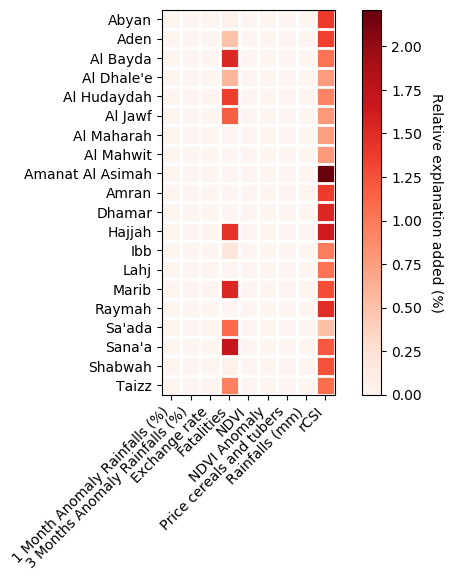

In [16]:
fig, ax = plt.subplots(figsize = (7, 5))
im = ax.imshow(T_fcs_perc, cmap = "Reds")
cbar = fig.colorbar(im, ax = ax)
cbar.set_label("Relative explanation added (%)", rotation = 270, labelpad = 15)

ax.set_xticks(range(len(T_fcs_perc.columns)))
ax.set_yticks(range(len(T_fcs_perc.index)))
ax.set_xticklabels(T_fcs.columns, rotation = 45)
ax.set_yticklabels(T_fcs.index)

for i in range(T_fcs_perc.shape[0]):
    ax.axhline(i + 0.5, color = "white", lw = 2)
for i in range(T_fcs_perc.shape[1]):
    ax.axvline(i + 0.5, color = "white", lw = 2)

plt.xticks(rotation = 45, ha = "right");

# Save the figure.
fig.savefig(f"./output_images/Importance_{COUNTRY}.png", bbox_inches = "tight", dpi = 300)

## Example

In [17]:
adminstrata = "Hajjah"

x = df[adminstrata]["Fatalities"].values.copy()
y = df[adminstrata]["FCG"].values.copy()

# Find the max delta.
deltas = list()
for delta in range(15):
    ste_delta = STE.calc_ste(x, y, m = 3, h = delta+1) 
    deltas.append(ste_delta)        

deltas = pd.Series(deltas) 
deltas.index = deltas.index + 1

max_delta = deltas.idxmax()
max_delta

11

In [18]:
# Compute real value of STE from X to Y.
true_STE = STE.calc_ste(x, y, m = 3, h = max_delta)
print(f"STE from X to Y: {round(true_STE, 4)}")

# Compute value of STE from X (shuffled 50 times) to Y.
shuffle_STE = list()
for i in range(50):
    x_shuffle = x.copy()
    np.random.shuffle(x_shuffle)
    shuffle_STE.append(STE.calc_ste(x_shuffle, y, m = 3, h = max_delta))  
shuffle_STE = np.mean(shuffle_STE)
print(f"STE from X (shuffled 50 times) to Y: {round(shuffle_STE, 4)}")

eff_STE = true_STE - shuffle_STE
print(f"Effective STE: {round(eff_STE, 4)}")

print(f"Relative explanation added: {round(((eff_STE) / STE.entropy_rate(y, m = 3, h = max_delta))*100, 2)} %")

STE from X to Y: 0.1785
STE from X (shuffled 50 times) to Y: 0.1441
Effective STE: 0.0344
Relative explanation added: 1.4 %


In [19]:
def compute_best_delta(x):
    idx = x.xs("REA", axis = 1, level = 2).idxmax().values[0]
    return idx
    
best_delta = df_STE_deltas.groupby(axis = 1, level = ["AdminStrata", "Indicator"], group_keys = False).apply(compute_best_delta).unstack("Indicator")

In [20]:
best_delta.median()

Indicator
1 Month Anomaly Rainfalls (%)     1.0
3 Months Anomaly Rainfalls (%)    1.0
Exchange rate                     1.0
Fatalities                        5.0
NDVI                              1.0
NDVI Anomaly                      1.0
Price cereals and tubers          1.0
Rainfalls (mm)                    1.0
rCSI                              7.0
dtype: float64

In [21]:
T_fcs_rank = T_fcs.transpose().rank(method = "max", ascending = False).transpose()
T_fcs_rank.head()

Indicator,1 Month Anomaly Rainfalls (%),3 Months Anomaly Rainfalls (%),Exchange rate,Fatalities,NDVI,NDVI Anomaly,Price cereals and tubers,Rainfalls (mm),rCSI
AdminStrata,,,,,,,,,
Abyan,3.0,5.0,8.0,2.0,6.0,9.0,7.0,4.0,1.0
Aden,8.0,6.0,9.0,2.0,3.0,7.0,4.0,5.0,1.0
Al Bayda,4.0,5.0,8.0,1.0,6.0,9.0,7.0,3.0,2.0
Al Dhale'e,5.0,4.0,7.0,2.0,9.0,8.0,6.0,3.0,1.0
Al Hudaydah,3.0,4.0,7.0,1.0,9.0,6.0,8.0,5.0,2.0


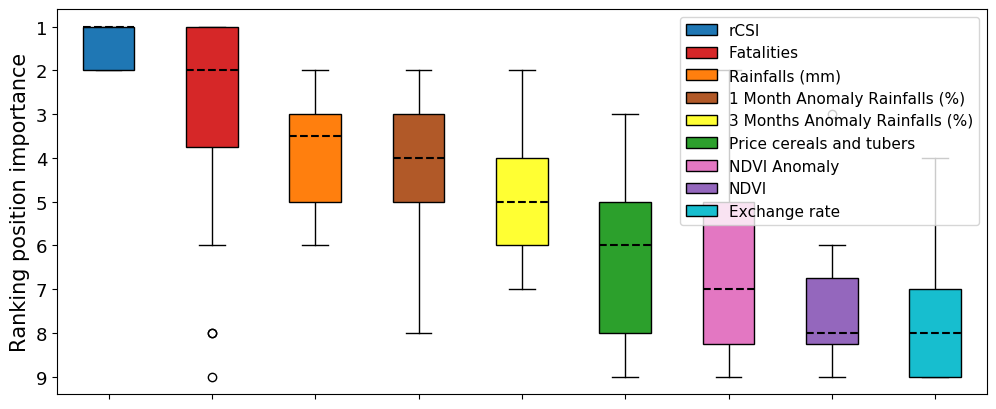

In [22]:
fig, ax = plt.subplots(figsize = (12, 5))
T_fcs_rank = T_fcs_rank.astype(int)
meds = T_fcs_rank.mean()
meds.sort_values(ascending = True, inplace = True)
T_fcs_rank_sort = T_fcs_rank[meds.index]

bplot = ax.boxplot(T_fcs_rank_sort.T, patch_artist = True, medianprops = {"linestyle": "--", "linewidth": 1.5, "color": "black"}) 
# Fill with colors.
legends = list()
for patch, indicator in zip(bplot["boxes"], T_fcs_rank_sort.columns):
    patch.set_facecolor(colors[indicator])
    patch.set_label(indicator)
    legends.append(patch)

ax.invert_yaxis()
#ax.set_xlabel("Indicator")
ax.set_ylabel("Ranking position importance", fontsize = 15)
ax.tick_params(labelsize = 13)
ax.set_xticklabels([""]*len(T_fcs_rank_sort.columns), rotation = 0, fontsize = 15)  

ax.legend(legends, T_fcs_rank_sort.columns, loc = "upper right", prop = {"size": 11})

# Save the figure.
fig.savefig(f"./output_images/Ranking_{COUNTRY}.png", bbox_inches = "tight", dpi = 300)